# PORJECT 1

---

## code to categorize healthy and unhealthy food 

In [144]:
import pandas as pd
import requests
import json
import csv
from operator import itemgetter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




In [145]:
# Specify the file path
file_path = '/Users/win/Desktop/pro1/Average_food_expenditure_per_household2.csv'  

# Read the data into a DataFrame
data = pd.read_csv(file_path)
data.head()

,Year,Category,Average expenditure per household
0,2015,Food expenditures 7,"8,629"
1,2015,Food purchased from stores,"6,126"
2,2015,Bakery products,574
3,2015,Bread and unsweetened rolls and buns,256
4,2015,Bread,184


In [146]:
API_KEY = '5KSaEsN5YQ9silcDZDEJAtlGTf8gbVKfc2dBvOsi'
URL = "https://api.nal.usda.gov/fdc/v1/foods/search"

# Keywords to classify food
healthy_keywords = ['fruit', 'vegetable', 'whole grain','milk', 'nuts', 'seeds', 'apple', 
                    'mushroom', 'fresh','low-fat','potatoes', 'tofu', 'egg', 'beef', 'pork']
unhealthy_keywords = ['fried', 'soda', 'candy', 'fast food', 'chips','frozen'
                      'processed', 'soft drinks', 'sugar','canned', 'restaurant','Restaurant']

# Your existing functions (get_food_nutrients, is_healthy) ...
def get_food_nutrients(query, api_key):
    parameters = {
        "query": query,
        "api_key": api_key,
        "dataType": ["Survey (FNDDS)", "SR Legacy"],
    }
    response = requests.get(URL, params=parameters)

    if response.status_code == 200:
        data = response.json()
        if 'foods' in data and data['foods']:
            return data['foods'][0].get("foodNutrients")
    return None


def is_healthy(food_nutrients):
    protein = 0
    fiber = 0
    saturated_fats = 0

    for nutrient in food_nutrients:
        if nutrient['nutrientName'] == 'Protein':
            protein = float(nutrient['value'])
        elif nutrient['nutrientName'] == 'Fiber, total dietary':
            fiber = float(nutrient['value'])
        elif nutrient['nutrientName'] == 'Fatty acids, total saturated':
            saturated_fats = float(nutrient['value'])

    return protein > 9 and fiber > 1 and saturated_fats < 3

# Lists to store healthy and unhealthy categories
healthy_categories = set()
unhealthy_categories = set()

# Read the CSV file
with open('/Users/win/Desktop/pro1/Average_food_expenditure_per_household2.csv', mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        food_category = row['Category'].lower()

        # Skip unwanted categories
        if food_category in ["food expenditures 7", "food purchased from stores"]:
            continue
        
        # Check if we can classify by keyword
        classified = False
        for word in healthy_keywords:
            if word in food_category:
                healthy_categories.add(food_category)
                classified = True
                break
        
        for word in unhealthy_keywords:
            if word in food_category:
                unhealthy_categories.add(food_category)
                classified = True
                break
        
        # If not classified by keyword, use the API
        if not classified:
            food_nutrients = get_food_nutrients(food_category, API_KEY)
            if food_nutrients:
                if is_healthy(food_nutrients):
                    healthy_categories.add(food_category)
                else:
                    unhealthy_categories.add(food_category)
        
        # Stop processing after 257 rows
        if reader.line_num == 257:
            break

# Output results
print("Healthy categories:")
for category in healthy_categories:
    print(f"    {category}")

print("\nUnhealthy categories:")
for category in unhealthy_categories:
    print(f"    {category}")


Healthy categories:
    eggplant (fresh)
    cauliflower (fresh)
    bananas and plantains (fresh)
    citrus fruit (fresh)
    corn (fresh)
    concentrated fruit juice (frozen)
    ready-to-serve or ready-to-cook prepared salads and side dishes, fruit or vegetable based
    fluid low-fat milk (1%)
    crackers and crisp breads
    tomatoes (fresh)
    other fish (fresh or frozen, uncooked)
    fruit, fruit preparations and nuts
    all other vegetables (canned or bottled, except infant foods)
    fresh or frozen fish
    fruit drinks (canned, bottled or frozen)
    fruit-flavoured drink powders, crystals and syrups
    pickled vegetables (including olives)
    other preserved fruit and fruit preparations
    frozen side dishes and other frozen prepared food
    dried herbs and spices
    grapes (fresh)
    eggs
    fluid whole milk
    beans (fresh)
    pasta (fresh or dry)
    fruit pie filling
    dried vegetables and legumes
    nectarines (fresh)
    pork
    peaches (fresh)
    

In [157]:
print(len(healthy_categories))
print(len(unhealthy_categories))
print(f"Healthy categories: {healthy_categories}")
print(f"Unhealthy categories: {unhealthy_categories}")


102
162
Healthy categories: {'eggplant (fresh)', 'cauliflower (fresh)', 'bananas and plantains (fresh)', 'citrus fruit (fresh)', 'corn (fresh)', 'concentrated fruit juice (frozen)', 'ready-to-serve or ready-to-cook prepared salads and side dishes, fruit or vegetable based', 'fluid low-fat milk (1%)', 'crackers and crisp breads', 'tomatoes (fresh)', 'other fish (fresh or frozen, uncooked)', 'fruit, fruit preparations and nuts', 'all other vegetables (canned or bottled, except infant foods)', 'fresh or frozen fish', 'fruit drinks (canned, bottled or frozen)', 'fruit-flavoured drink powders, crystals and syrups', 'pickled vegetables (including olives)', 'other preserved fruit and fruit preparations', 'frozen side dishes and other frozen prepared food', 'dried herbs and spices', 'grapes (fresh)', 'eggs', 'fluid whole milk', 'beans (fresh)', 'pasta (fresh or dry)', 'fruit pie filling', 'dried vegetables and legumes', 'nectarines (fresh)', 'pork', 'peaches (fresh)', 'peaches and nectarines (

In [179]:
import pandas as pd

# Make sure healthy_categories and unhealthy_categories are already defined.

# Read the CSV file into a DataFrame
data = pd.read_csv('/Users/win/Desktop/pro1/Average_food_expenditure_per_household2.csv')

# Initialize dictionaries to accumulate expenditures
healthy_expenditure_by_year = {}
unhealthy_expenditure_by_year = {}

# Iterate through the DataFrame
for index, row in data.iterrows():
    try:
        year = int(row['Year'])
    except ValueError:
        continue

    category = row['Category'].lower().strip()  # strip whitespaces
    avg_expenditure_str = str(row['Average expenditure per household']).replace(',', '')
    
    # Debugging: Print category
    #print(f"Processing category: {category}")

    # Skip rows with 'F' value
    if avg_expenditure_str == 'F':
        continue

    # Convert to float
    try:
        avg_expenditure = float(avg_expenditure_str)
    except ValueError:
        continue

    # Check if the category is healthy or unhealthy
    if category in healthy_categories:
        if year in healthy_expenditure_by_year:
            healthy_expenditure_by_year[year] += avg_expenditure
        else:
            healthy_expenditure_by_year[year] = avg_expenditure
        print(f"Classified as healthy category: {category}, year: {year}, expenditure: {avg_expenditure}")

    elif category in unhealthy_categories:
        if year in unhealthy_expenditure_by_year:
            unhealthy_expenditure_by_year[year] += avg_expenditure
        else:
            unhealthy_expenditure_by_year[year] = avg_expenditure
        print(f"Classified as unhealthy category: {category}, year: {year}, expenditure: {avg_expenditure}")

    else:
        print(f"Category not classified: {category}")

# Convert dictionaries to lists for plotting
years = sorted(list(healthy_expenditure_by_year.keys()))
healthy_expenditure = [healthy_expenditure_by_year[year] for year in years]
unhealthy_expenditure = [unhealthy_expenditure_by_year[year] for year in years]


Category not classified: food expenditures 7
Category not classified: food purchased from stores
Classified as unhealthy category: bakery products, year: 2015, expenditure: 574.0
Classified as healthy category: bread and unsweetened rolls and buns, year: 2015, expenditure: 256.0
Classified as unhealthy category: bread, year: 2015, expenditure: 184.0
Classified as healthy category: unsweetened rolls and buns, year: 2015, expenditure: 71.0
Classified as unhealthy category: cookies and crackers, year: 2015, expenditure: 126.0
Classified as unhealthy category: cookies and sweet biscuits, year: 2015, expenditure: 77.0
Classified as healthy category: crackers and crisp breads, year: 2015, expenditure: 49.0
Classified as unhealthy category: other bakery products, year: 2015, expenditure: 192.0
Classified as unhealthy category: other bakery products (except frozen), year: 2015, expenditure: 175.0
Classified as unhealthy category: ready-to-bake bakery products (except frozen), year: 2015, expen

In [180]:
# Create a DF expenditure data
expenditure_data = pd.DataFrame({'Year': years, 'Healthy_Expenditure': healthy_expenditure, 'Unhealthy_Expenditure': unhealthy_expenditure})

# Summary Statistics for Healthy and Unhealthy Expenditures
summary_statistics_healthy = expenditure_data['Healthy_Expenditure'].describe()
summary_statistics_unhealthy = expenditure_data['Unhealthy_Expenditure'].describe()

print("Summary Statistics for Healthy Food Expenditure:")
print(summary_statistics_healthy)
print("\nSummary Statistics for Unhealthy Food Expenditure:")
print(summary_statistics_unhealthy)

Summary Statistics for Healthy Food Expenditure:
count        4.000000
mean      9319.750000
std       1001.793517
min       8671.000000
25%       8746.000000
50%       8901.500000
75%       9475.250000
max      10805.000000
Name: Healthy_Expenditure, dtype: float64

Summary Statistics for Unhealthy Food Expenditure:
count        4.000000
mean     21138.000000
std       1572.934625
min      20012.000000
25%      20299.250000
50%      20539.500000
75%      21378.250000
max      23461.000000
Name: Unhealthy_Expenditure, dtype: float64


For Healthy Food Expenditure:

There are 4 data points.
The average (mean) expenditure is about 9319.75.
The standard deviation, which measures the amount of variation or dispersion of a set of values, is approximately 1001.79.
The minimum expenditure is 8671.
The 25th percentile (1st quartile) is around 8746.
The median (50th percentile or 2nd quartile) is about 8901.5.
The 75th percentile (3rd quartile) is around 9475.25.
The maximum expenditure is 10805.
For Unhealthy Food Expenditure:

There are 4 data points.
The average (mean) expenditure is about 21457.75.
The standard deviation is approximately 1597.34.
The minimum expenditure is 20328.
The 25th percentile (1st quartile) is around 20601.75.
The median (50th percentile or 2nd quartile) is about 20842.
The 75th percentile (3rd quartile) is around 21698.
The maximum expenditure is 23819.

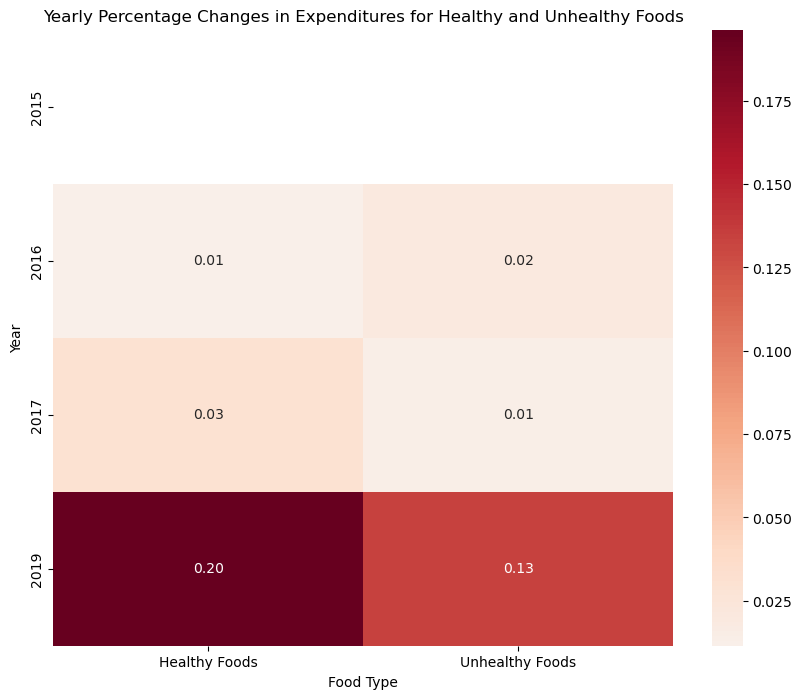

In [182]:
def categorize_food(row):
    category = row['Category'].lower()
    if category in healthy_categories:
        return 'Healthy Foods'
    elif category in unhealthy_categories:
        return 'Unhealthy Foods'
    else:
        return 'Unclassified'

def convert_to_float(value):
    if isinstance(value, float):
        return value
    try:
        return float(value.replace(',', ''))
    except ValueError:
        return None

data['Average expenditure per household'] = data['Average expenditure per household'].apply(convert_to_float)



# Categorize the food (Healthy or Unhealthy) for each row in the DataFrame
data['Food_Type'] = data.apply(categorize_food, axis=1)


# Filter data for healthy and unhealthy categories
filtered_data = data[data['Food_Type'].isin(['Healthy Foods', 'Unhealthy Foods'])]

# Aggregate the data
aggregated_data = filtered_data.groupby(['Year', 'Food_Type'], as_index=False)['Average expenditure per household'].sum()
pivot_table = aggregated_data.pivot(index='Year', columns='Food_Type', values='Average expenditure per household')

# Calculate the percentage change
percentage_change = pivot_table.pct_change().replace([np.inf, -np.inf], np.nan)

#heatmap for percentage changes
plt.figure(figsize=(10, 8))
sns.heatmap(percentage_change, cmap="RdBu_r", annot=True, fmt=".2f", center=0)
plt.title('Yearly Percentage Changes in Expenditures for Healthy and Unhealthy Foods')
plt.xlabel('Food Type')
plt.ylabel('Year')

# Show the plot
plt.show()



Over the years, there has been a notable increase in expenditures on both healthy and unhealthy food categories. Initially, the rate of change in expenditures for healthy foods was slower but observed to pick up significantly in the later years. In contrast, expenditures on unhealthy foods increased at a more stable rate. Particularly from 2017 to 2019, expenditures on healthy foods surged by 20%, whereas unhealthy foods saw a moderate 13% increase. This substantial rise in healthy food expenditures might indicate a shift in consumer behavior toward a more health-conscious lifestyle. Additionally, it is crucial to consider the influence of external factors such as food prices, inflation, public awareness campaigns, or changes in dietary guidelines, which might have played a role in these trends. From a public health standpoint, the possible shift toward healthier eating is a positive development. Policymakers and stakeholders should contemplate strategies to encourage and sustain this trend. However, a comprehensive analysis involving additional data on quantities purchased, consumer income levels, and other socioeconomic factors is necessary for a more conclusive understanding of food expenditure patterns.

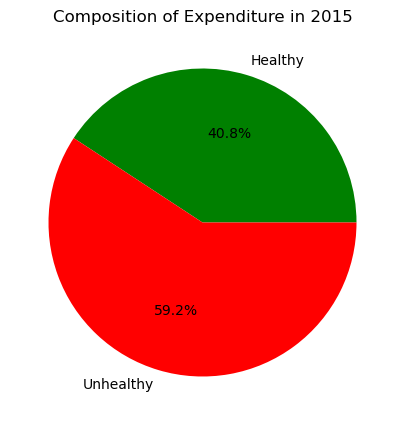

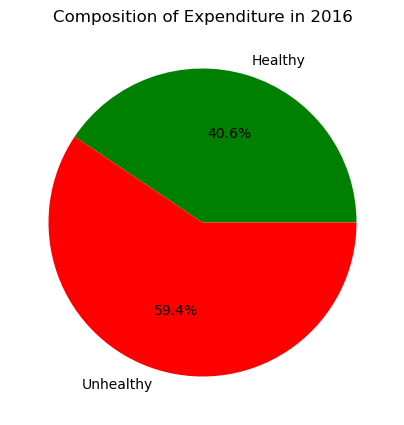

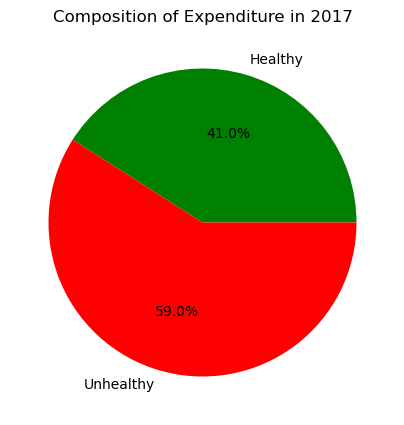

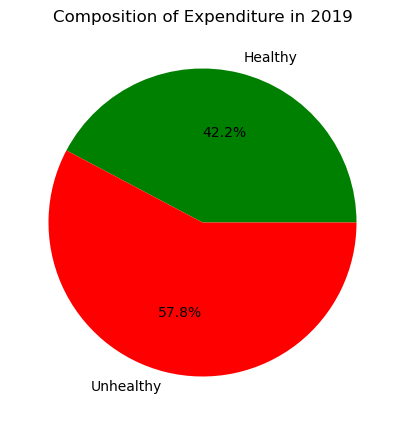

In [171]:
num_healthy_items = len(healthy_categories)
num_unhealthy_items = len(unhealthy_categories)

# Normalize expenditures by the number of items in each category
normalized_healthy_expenditure = [exp / num_healthy_items for exp in healthy_expenditure]
normalized_unhealthy_expenditure = [exp / num_unhealthy_items for exp in unhealthy_expenditure]

# Pie Chart for Yearly Composition
for year, healthy, unhealthy in zip(years, normalized_healthy_expenditure, normalized_unhealthy_expenditure):
    plt.figure(figsize=(5, 5))
    plt.pie([healthy, unhealthy], labels=['Healthy', 'Unhealthy'], colors=['g', 'r'], autopct='%1.1f%%')
    plt.title(f'Composition of Expenditure in {year}')
    plt.show()


The pie charts represent the composition of expenditures within a given year. It displays what percentage of the total expenditures are spent on healthy foods and what percentage are spent on unhealthy foods within a specific year.

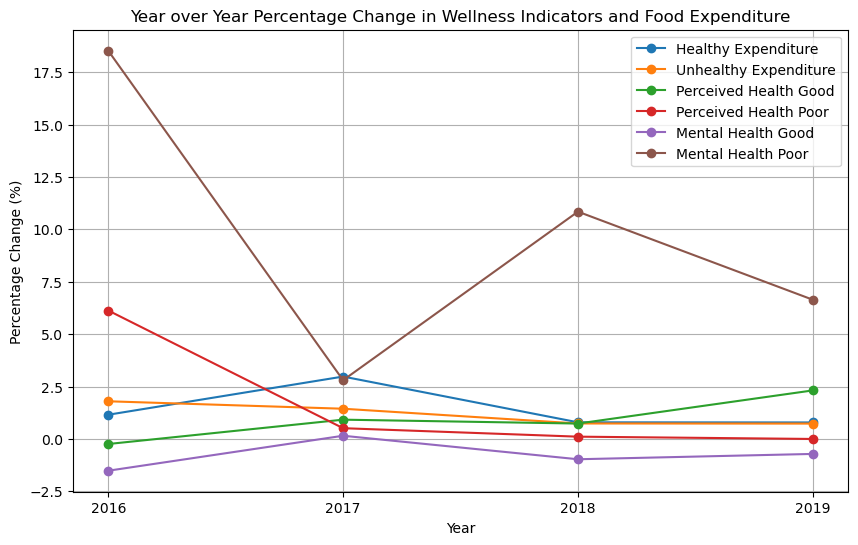

In [183]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def safe_percentage_change(data):
    # Safely calculate percentage change, avoiding division by zero
    diff = np.diff(data)
    prev_vals = data[:-1]
    return np.where(prev_vals != 0, diff / prev_vals * 100, 0)


# Read the wellness data from the CSV file
wellness_data_path = '/Users/win/Desktop/pro1/wellness.csv'
wellness_data = pd.read_csv(wellness_data_path)

# Remove commas from the numbers and convert them to float
for year in ['2015', '2016', '2017', '2018', '2019']:
    wellness_data[year] = (wellness_data[year].str.replace(',', '')
                                               .replace('..', 'NaN')
                                               .fillna(0).astype(float))

# Placeholder data for healthy and unhealthy expenditure.
# Replace these with the actual data.
healthy_expenditure = np.array([17342.0, 17542.0, 18064.0, (18064.0 + 18350.0) / 2, 18350.0])
unhealthy_expenditure = np.array([40656.0, 41386.0, 41982.0, (41982.0 + 42600.0) / 2, 42600.0])

# Extract data and calculate percentage changes
perceived_health_good = safe_percentage_change(wellness_data.loc[0, '2015':'2019'].values)
perceived_health_poor = safe_percentage_change(wellness_data.loc[1, '2015':'2019'].values)
mental_health_good = safe_percentage_change(wellness_data.loc[2, '2015':'2019'].values)
mental_health_poor = safe_percentage_change(wellness_data.loc[3, '2015':'2019'].values)
healthy_expenditure_change = safe_percentage_change(healthy_expenditure)
unhealthy_expenditure_change = safe_percentage_change(unhealthy_expenditure)

# Years for which we have data
years = ['2016', '2017', '2018', '2019']

# Plotting the percentage change data
plt.figure(figsize=(10, 6))
plt.plot(years, healthy_expenditure_change, label='Healthy Expenditure', marker='o')
plt.plot(years, unhealthy_expenditure_change, label='Unhealthy Expenditure', marker='o')
plt.plot(years, perceived_health_good, label='Perceived Health Good', marker='o')
plt.plot(years, perceived_health_poor, label='Perceived Health Poor', marker='o')
plt.plot(years, mental_health_good, label='Mental Health Good', marker='o')
plt.plot(years, mental_health_poor, label='Mental Health Poor', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.title('Year over Year Percentage Change in Wellness Indicators and Food Expenditure')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


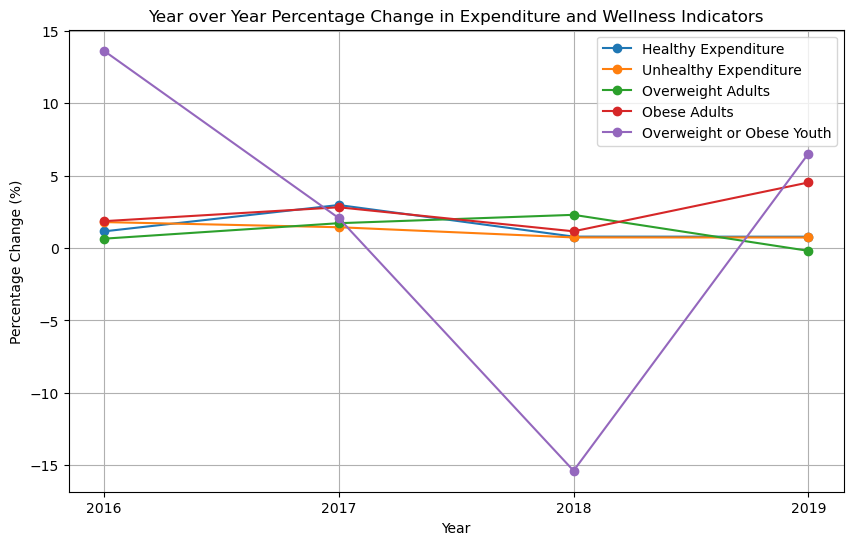

In [184]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def safe_percentage_change(data):
    # A function to safely calculate percentage change
    # avoiding division by zero.
    diff = np.diff(data)
    prev_vals = data[:-1]
    return np.where(prev_vals != 0, diff / prev_vals * 100, 0)
wellness_data = pd.read_csv('/Users/win/Desktop/pro1/wellness.csv')

# Remove commas from the numbers and convert them to float
for year in ['2015', '2016', '2017', '2018', '2019']:
    wellness_data[year] = (wellness_data[year].str.replace(',', '', regex=True)
                                               .replace(r'\.\.*', 'nan', regex=True)
                                               .astype(float))

# Extracting relevant data for plotting
overweight_adults = wellness_data.loc[wellness_data['Indicators'].str.contains('Body mass index, adjusted self-reported, adult.*overweight'), '2015':'2019'].values[0]
obese_adults = wellness_data.loc[wellness_data['Indicators'].str.contains('Body mass index, adjusted self-reported, adult.*obese'), '2015':'2019'].values[0]
overweight_or_obese_youth = wellness_data.loc[wellness_data['Indicators'].str.contains('Body mass index, self-reported, youth.*overweight or obese'), '2015':'2019'].values[0]

# Original data for healthy and unhealthy expenditures
healthy_expenditure = np.array([17342.0, 17542.0, 18064.0, (18064.0 + 18350.0) / 2, 18350.0])
unhealthy_expenditure = np.array([40656.0, 41386.0, 41982.0, (41982.0 + 42600.0) / 2, 42600.0])

# Calculating the percentage changes
healthy_expenditure_change = safe_percentage_change(healthy_expenditure)
unhealthy_expenditure_change = safe_percentage_change(unhealthy_expenditure)
overweight_adults_change = safe_percentage_change(overweight_adults)
obese_adults_change = safe_percentage_change(obese_adults)
overweight_or_obese_youth_change = safe_percentage_change(overweight_or_obese_youth)

# Years for which we have data
years = ['2016', '2017', '2018', '2019']

# Plotting the percentage change data
plt.figure(figsize=(10, 6))
plt.plot(years, healthy_expenditure_change, label='Healthy Expenditure', marker='o')
plt.plot(years, unhealthy_expenditure_change, label='Unhealthy Expenditure', marker='o')
plt.plot(years, overweight_adults_change, label='Overweight Adults', marker='o')
plt.plot(years, obese_adults_change, label='Obese Adults', marker='o')
plt.plot(years, overweight_or_obese_youth_change, label='Overweight or Obese Youth', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.title('Year over Year Percentage Change in Expenditure and Wellness Indicators')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


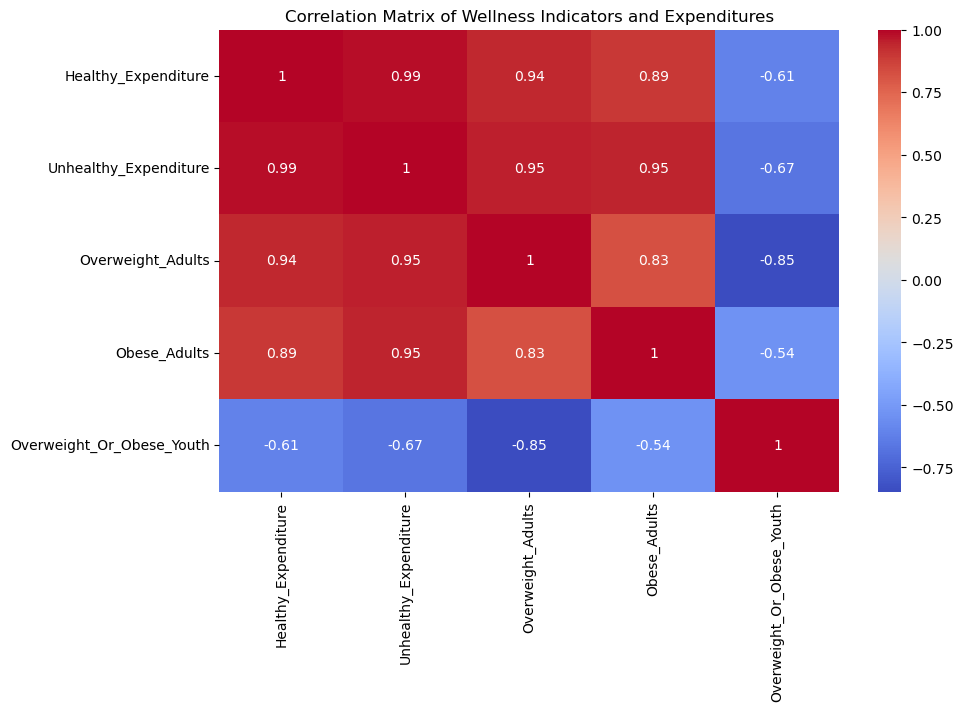

In [174]:
import seaborn as sns

# Concatenate all the data into a single DataFrame for correlation analysis
data_for_correlation = pd.DataFrame({
    'Healthy_Expenditure': healthy_expenditure[1:],
    'Unhealthy_Expenditure': unhealthy_expenditure[1:],
    'Overweight_Adults': overweight_adults[1:],
    'Obese_Adults': obese_adults[1:],
    'Overweight_Or_Obese_Youth': overweight_or_obese_youth[1:]
}, index=years)

# Calculate the correlation matrix
correlation_matrix = data_for_correlation.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wellness Indicators and Expenditures')
plt.show()


The correlation matrix reveals that as spending on healthy options increases, so does spending on unhealthy options, with a near-perfect correlation of 0.99. This strong linear relationship also extends to the number of overweight and obese adults, which shows strong positive correlations with Healthy_Expenditure. Interestingly, there is a negative correlation between spending on healthy options and the number of overweight or obese youth, indicating that increased healthy spending may be associated with a decrease in overweight or obese youth. However, spending on unhealthy options is positively correlated with the number of overweight and obese adults but negatively correlated with overweight or obese youth. The number of overweight adults is strongly positively correlated with the number of obese adults but negatively correlated with overweight or obese youth. These patterns suggest complex relationships between expenditures and wellness indicators, potentially influenced by various factors and different trends affecting adults and youth. It is crucial to understand that correlation does not imply causation, and further analysis is necessary to explore these relationships in depth.

- Healthy_Expenditure and Unhealthy_Expenditure are almost perfectly correlated with a coefficient of 0.99, indicating a very strong linear relationship between the two.

-Healthy_Expenditure has strong positive correlations with the number of Overweight_Adults and Obese_Adults (coefficients of 0.94 and 0.89, respectively), suggesting that increases in healthy spending coincide with increases in overweight and obesity rates among adults.

-There is a moderate negative correlation of -0.61 between Healthy_Expenditure and Overweight_Or_Obese_Youth, implying that as spending on healthy options increases, the number of overweight or obese youth tends to decrease.

-Unhealthy_Expenditure exhibits strong positive correlations with Overweight_Adults and Obese_Adults (coefficients of 0.95 for both), indicating that as spending on unhealthy options increases, the number of overweight and obese adults tends to also increase.

-Unhealthy_Expenditure has a moderate negative correlation of -0.67 with Overweight_Or_Obese_Youth, suggesting that an increase in unhealthy spending is associated with a decrease in the number of overweight or obese youth.

-There is a strong positive correlation of 0.83 between Overweight_Adults and Obese_Adults, indicating that increases in the number of overweight adults are associated with increases in the number of obese adults.

-Overweight_Adults has a strong negative correlation of -0.85 with Overweight_Or_Obese_Youth, suggesting an inverse relationship between the number of overweight adults and overweight or obese youth.

-A moderate negative correlation of -0.54 exists between Obese_Adults and Overweight_Or_Obese_Youth, indicating that as the number of obese adults increases, the number of overweight or obese youth tends to decrease.
